# Hands On: Data Import and Manipulation

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files
# under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved
# as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the
# current session

/kaggle/input/ServiceArea/ServiceArea.csv


## 1. Introduction to Python for Machine Learning

### (a) Create an array of 10 random integers between 1 and 100, and then calculate the mean and standard deviation of the array.

In [11]:
# Create an array of 10 integers between 1 and 100
a = [25, 16, 99, 85, 67, 15]
print(a)
print(len(a))
print(type(a))
# al ser una lista puede tener valores de texto también,
# por lo que buscar un método "mean" para calcular la media no sería posible,
# en cambio para b sí lo es ya que es un array np. y np trabaja solo con números,
# entonces sí se puede traer la media "mean"

# Calculate the mean and standard deviation of the array.
print(np.mean(a))
print(np.std(a))

[25, 16, 99, 85, 67, 15]
6
<class 'list'>
51.166666666666664
33.943171461855016


In [17]:
# Now with random
b = np.random.randint(1, high=101, size=10)
print(b)
print(len(b))
print(type(b))
print('Media: ',b.mean())
print('Desviacion:',b.std())

[27  6 36 52 20 40 57 10 92 70]
10
<class 'numpy.ndarray'>
Media:  41.0
Desviacion: 25.822470834527046


### (b) Create a 2-dimensional array of 3 rows and 4 columns with random integer values. Then, calculate the sum of each row and column

In [18]:
# Create a 2-dimensional array of 3 rows and 4 columns with random integer values
matrix  = np.random.randint(5, size=(3,4))    # números entre el 0 y el 4, matriz de tamaño 3x4
print(matrix)

# Calculate the sum of each row and column
sumCols = np.sum(matrix, axis=0)
print('Suma de columnas:',sumCols)
sumRows = matrix.sum(axis=1)
print('Suma de filas:\t',sumRows)
# axis: depende de la dimensión de la matriz
# como la matriz es 3x4 la dimensión/eje 0 es 3 (columnas)
# y la dimensión/eje 1 es 4 (filas)

[[2 0 1 4]
 [3 4 2 4]
 [2 1 4 2]]
Suma de columnas: [ 7  5  7 10]
Suma de filas:	 [ 7 13  9]


### (c) Create a DataFrame with 3 columns: "Name", "Age", and "City". Add at least 5 rows of data to the DataFrame. Then, filter the DataFrame to only include rows where the person's age is greater than or equal to 30.

In [15]:
# Create a DataFrame with 3 columns: "Name", "Age", and "City".
df = pd.DataFrame()
df['Name'] = None
df = df.assign(Age=None)          # otra manera de agregar columnas al df
df['City'] = None

print('Data Frame vacio\n',df)

# Add at least 5 rows of data to the DataFrame.
# con listas
names = ['Judith','Johanna','Jonathan', 'Javier', 'Jessenia']
ages = [47,27,26,24,22]
cities = ['Quito','Cuenca','Loja','Manabi','Ibarra']

df['Name'] = names
df['Age'] = ages
df['City'] = cities

# con un diccionario
newRow = { 'Name': 'Luis', 'Age': 45,'City': 'Guayaquil'}
df = df.append(newRow, ignore_index=True)  #ignora el índice cuando por ejemplo los datos vienen de otro dataframe que sí tiene índice

# con un objeto Series
newRow = pd.Series(['Andres', 26, 'Esmeraldas'], index=df.columns) #toma las columnas del df para no escribirlas manualmente
df = df.append(newRow, ignore_index=True)

print('\nData Frame llenado:\n',df)

# Filter: only include rows where the person's age is greater than or equal to 30.
greaterEqual = df['Age'] >= 30
dfWithFilter = df[greaterEqual]

print('\nData Frame filtrado:\n',dfWithFilter)

Data Frame vacio
 Empty DataFrame
Columns: [Name, Age, City]
Index: []

Data Frame llenado:
        Name  Age        City
0    Judith   47       Quito
1   Johanna   27      Cuenca
2  Jonathan   26        Loja
3    Javier   24      Manabi
4  Jessenia   22      Ibarra
5      Luis   45   Guayaquil
6    Andres   26  Esmeraldas

Data Frame filtrado:
      Name  Age       City
0  Judith   47      Quito
5    Luis   45  Guayaquil


/tmp/ipykernel_34/2954004401.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newRow, ignore_index=True)  #ignora el índice cuando por ejemplo los datos vienen de otro dataframe que sí tiene índice
/tmp/ipykernel_34/2954004401.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newRow, ignore_index=True)


### (d) Load a CSV file into a DataFrame and then calculate the mean, median, and mode of one of the columns in the DataFrame. 

In [5]:
# Load a CSV file into a DataFrame
serviceArea = pd.read_csv('/kaggle/input/ServiceArea/ServiceArea.csv')
print(serviceArea)

# Calculate the mean, median, and mode of one of the columns in the DataFrame
print('La media es:\t', serviceArea['BusinessYear'].mean())
print('La mediana es:\t', serviceArea['BusinessYear'].median())
print('La moda es:\t', serviceArea['BusinessYear'].mode())

       BusinessYear StateCode  IssuerId SourceName  VersionNum  \
0              2014        PA     22444       HIOS           9   
1              2014        PA     22444       HIOS           9   
2              2014        PA     22444       HIOS           9   
3              2014        PA     22444       HIOS           9   
4              2014        PA     22444       HIOS           9   
...             ...       ...       ...        ...         ...   
42242          2016        WV     96480      SERFF           2   
42243          2016        WV     96480      SERFF           2   
42244          2016        WV     96480      SERFF           2   
42245          2016        WV     96480      SERFF           2   
42246          2016        WV     96480      SERFF           2   

                ImportDate  IssuerId2 StateCode2 ServiceAreaId  \
0      2014-01-21 08:29:49      22444         PA        PAS001   
1      2014-01-21 08:29:49      22444         PA        PAS001   
2      20

### (e) Create a scatter plot of random x and y values between 1 and 100.

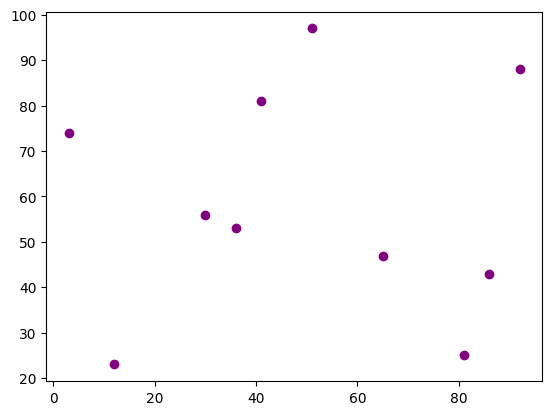

In [16]:
x = np.random.randint(low=1,high=100,size=10)
y = np.random.randint(low=1,high=100,size=10)

plt.scatter(x, y, label="x vs y", color="purple") 

### (f) Load a CSV file into a DataFrame and then create a line chart of one of the columns in the DataFrame.

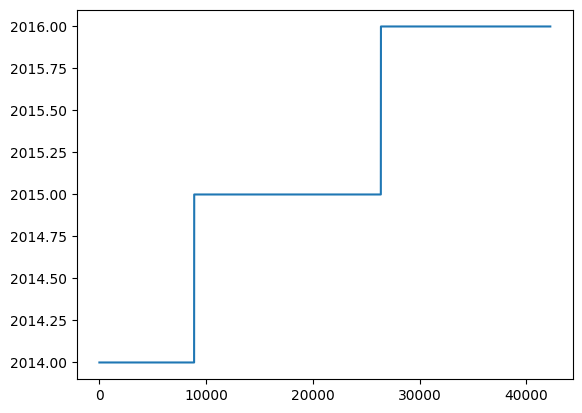

In [21]:
file = pd.read_csv('/kaggle/input/ServiceArea/ServiceArea.csv')
plt.plot(file['BusinessYear'])